<a href="https://colab.research.google.com/github/timothewt/SP100_Price_Forecasting/blob/main/SP100_-_Analysis_and_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install wikipedia

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import wikipedia as wp
import matplotlib.pyplot as plt
import os

### Getting the tickers of all the companies in the S&P100
We use the wikipedia library to scrap the S&P100 page, only keeping the tickers.

In [4]:
wikipedia_page = "S&P 100"
html = wp.page(wikipedia_page).html().encode("UTF-8")
sp100_df = pd.read_html(html)[2]
sp100_df = sp100_df[['Symbol']].set_index("Symbol").transpose()
sp100_df

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM


### Getting the prices for the last years using the yfinance API
The values are stored in a list for each row of the dataframe.

In [5]:
for index, _ in sp100_df.iteritems():
  sp100_df[index] = yf.Ticker(index).history("10y")["Close"]
sp100_df_daily_returns = sp100_df.pct_change(1).tail(-1)
sp100_df

BRK.B: No data found, symbol may be delisted


Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-08 00:00:00-05:00,13.316732,24.858936,28.686716,64.997017,41.500000,32.065022,2.560000,71.553291,63.602642,13.709500,...,46.141422,55.877804,62.702801,25.633673,37.465836,30.320103,30.544691,27.417316,58.866962,58.178104
2013-03-11 00:00:00-04:00,13.506431,25.078623,28.893520,64.955544,41.480000,31.975910,2.590000,70.353020,63.404770,13.562000,...,46.484413,56.276630,62.881008,25.768467,37.584774,30.225269,31.025700,27.890554,58.826679,58.302330
2013-03-12 00:00:00-04:00,13.215250,24.745747,28.934872,64.723274,41.400002,31.684256,2.610000,70.591553,62.687424,13.706500,...,47.016052,55.998661,62.769615,25.716049,37.262966,30.572981,30.845318,27.537510,59.326435,58.302330
2013-03-13 00:00:00-04:00,13.212780,24.745747,28.959696,64.648605,41.590000,31.506029,2.600000,70.429955,62.761642,13.755000,...,46.897263,56.224266,63.252300,25.626184,37.162716,30.307461,32.153095,27.620138,59.366734,58.367714
2013-03-14 00:00:00-04:00,13.340789,25.005398,29.067228,64.922363,41.619999,31.611347,2.630000,70.922371,63.000751,13.287000,...,47.112465,56.804401,63.586449,25.506369,37.463516,30.648844,32.108006,27.770365,59.020134,58.740448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01 00:00:00-05:00,145.309998,155.270004,100.830002,263.589996,323.380005,60.959999,78.290001,236.190002,194.889999,92.169998,...,475.220001,207.990005,183.080002,47.310001,218.360001,38.299999,35.200001,46.680000,140.149994,110.889999
2023-03-02 00:00:00-05:00,145.910004,154.380005,102.629997,265.260010,333.500000,60.029999,80.440002,234.740005,197.529999,92.129997,...,477.700012,211.360001,184.679993,46.310001,219.059998,38.410000,35.380001,45.799999,140.500000,111.400002
2023-03-03 00:00:00-05:00,151.029999,156.059998,104.449997,269.200012,344.040009,60.200001,81.519997,234.809998,202.500000,94.900002,...,478.559998,209.360001,185.679993,47.110001,223.770004,38.259998,36.090000,46.849998,140.669998,112.809998


### Plotting all the prices history
We use a logarithmic scale because of high prices of some stocks.

In [6]:
def plot_stocks(df: pd.DataFrame, title: str, size: tuple, yscale: str) -> None:
  fig = plt.figure(figsize=size)
  ax = fig.add_subplot()
  ax.set_yscale(yscale)
  plt.xlabel('Days')
  plt.ylabel('Price ($)')
  plt.title(title)
  for _, series in df.iteritems():
    plt.plot(series)
  plt.show()

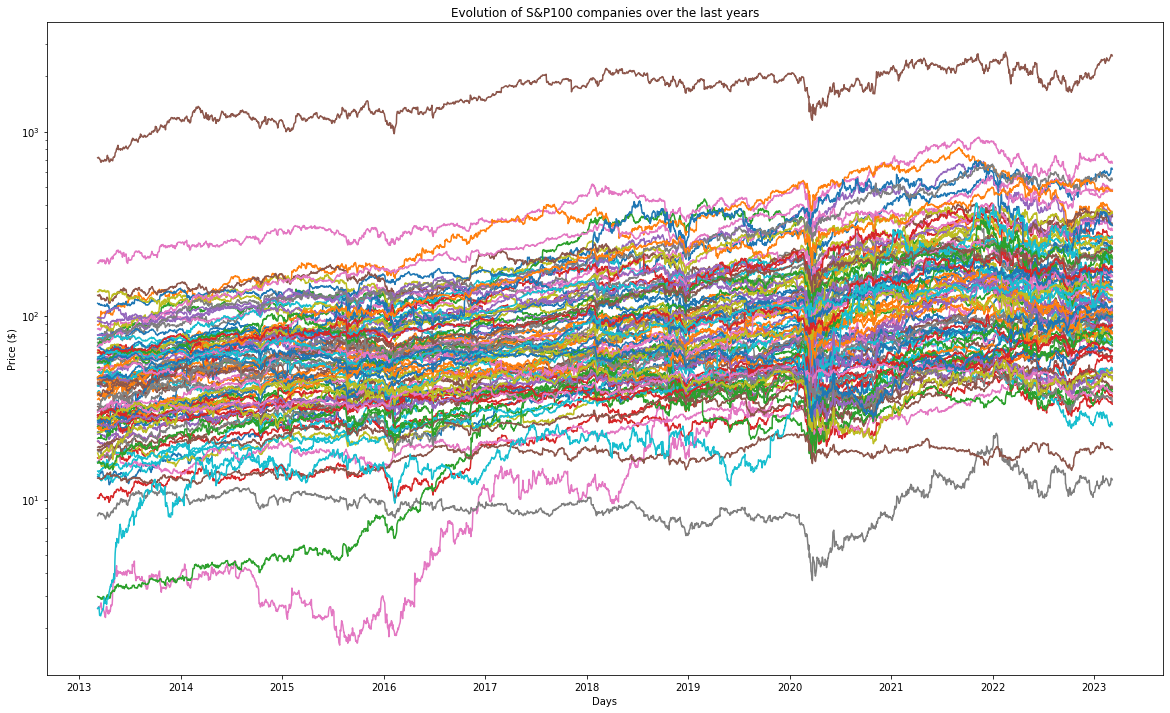

In [7]:
plot_stocks(sp100_df, "Evolution of S&P100 companies over the last years", (20, 12), 'log')

### Calculating the correlation values between all the stocks
We use the Pearson correlation coefficient with the corr() function of pandas.

In [8]:
sp100_corr = sp100_df_daily_returns.corr()
sp100_corr_matrix = sp100_corr.to_numpy()
sp100_corr

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.289146,0.460723,0.543561,0.564548,0.358375,0.395865,0.372544,0.385629,0.524011,...,0.415045,0.430897,0.429981,0.378205,0.537590,0.252056,0.329921,0.375611,0.317344,0.317599
ABBV,0.289146,1.000000,0.457254,0.376561,0.320668,0.333915,0.188205,0.504662,0.282730,0.255307,...,0.424214,0.335315,0.314063,0.351641,0.383008,0.303053,0.311380,0.334687,0.242466,0.308575
ABT,0.460723,0.457254,1.000000,0.569997,0.496675,0.366735,0.323674,0.526594,0.493312,0.385053,...,0.514449,0.420309,0.440419,0.426536,0.543117,0.389843,0.388794,0.401456,0.361807,0.297965
ACN,0.543561,0.376561,0.569997,1.000000,0.586973,0.514472,0.357104,0.423127,0.528809,0.480660,...,0.480297,0.541590,0.496467,0.549568,0.648682,0.378540,0.397482,0.521302,0.351170,0.415097
ADBE,0.564548,0.320668,0.496675,0.586973,1.000000,0.327828,0.413738,0.383915,0.434909,0.580098,...,0.384761,0.394299,0.431955,0.331668,0.595108,0.217231,0.299053,0.330826,0.303310,0.245283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VZ,0.252056,0.303053,0.389843,0.378540,0.217231,0.320638,0.152522,0.343353,0.400007,0.187834,...,0.340600,0.327045,0.329031,0.404767,0.334522,1.000000,0.352372,0.361126,0.356746,0.335746
WBA,0.329921,0.311380,0.388794,0.397482,0.299053,0.369604,0.191017,0.388229,0.279982,0.258267,...,0.363977,0.354605,0.382322,0.455011,0.359049,0.352372,1.000000,0.420048,0.355136,0.339294
WFC,0.375611,0.334687,0.401456,0.521302,0.330826,0.690484,0.239924,0.365148,0.334577,0.281133,...,0.435021,0.532390,0.445823,0.829856,0.525077,0.361126,0.420048,1.000000,0.265190,0.563515


Examples of highly correlated and low correlated stocks:

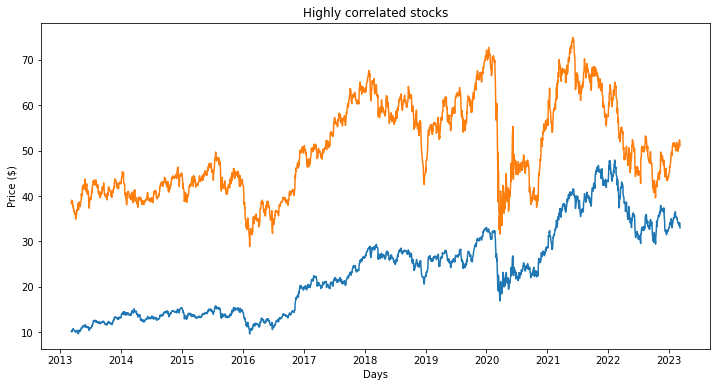

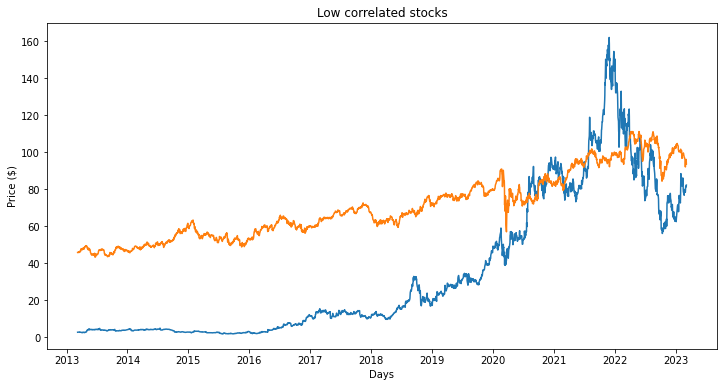

In [9]:
plot_stocks(sp100_df[["BAC","C"]], "Highly correlated stocks", (12, 6), "linear")
plot_stocks(sp100_df[["AMD", "DUK"]], "Low correlated stocks", (12, 6), "linear")

We can see that this correlation coefficient can help use analyze the data and also forecast better the future prices, by building links between some stocks.

### Price forecasting using a LSTM
- 10 inputs - prices of the 10 last days
- 1 output - the return of the 11th day

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math

Setting the GPU as the device

In [116]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Normalizing the data

In [272]:
sp100_df_mins = sp100_df.min()
sp100_df_maxs = sp100_df.max()
sp100_df_normalized = (sp100_df - sp100_df_mins) / (sp100_df_maxs - sp100_df_mins)

stock_to_predict = "DUK"

def denormalize(data):
  return data * (sp100_df_maxs[stock_to_predict] - sp100_df_mins[stock_to_predict]) + sp100_df_mins[stock_to_predict]

Getting the training and testing data from the normalized values

In [273]:
stock_values = sp100_df_normalized[stock_to_predict].head(2330)
training_size = 1800
testing_size = 500
input_size = 30 # number of days of data given in the lstm
# Training data
x_train = np.array([stock_values[i : input_size + i].to_list() for i in range(training_size)], dtype="float32")
y_train = np.array([[[stock_values[input_size + i]]] for i in range(training_size)], dtype="float32")

# Testing data
x_test = np.array([stock_values[i : input_size + i].to_list() for i in range(training_size, training_size + testing_size)], dtype="float32")
y_test = np.array([[[stock_values[input_size + i]]] for i in range(training_size, training_size + testing_size)], dtype="float32")

In [274]:
# Reshaping the data to fit the lstm input
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [275]:
# Setting the data as tensors
x_train_tensor = torch.tensor(x_train).to(device)
y_train_tensor = torch.tensor(y_train).to(device)

x_test_tensor = torch.tensor(x_test).to(device)
y_test_tensor = torch.tensor(y_test).to(device)

#### Defining and training the LSTM model
- 2 layers of LSTM
- 1 fully connected layer to get the ouput

In [304]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_output, _ = self.lstm(x)
        y_pred = self.fc(lstm_output)
        return y_pred

hidden_size = 64
num_layers = 2
output_size = 1
learning_rate = 0.01

model = LSTM(input_size, hidden_size, num_layers, output_size)
model.to(device)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Training the model

In [305]:
num_sequences_given = 2_000_000
num_epochs = math.ceil(num_sequences_given / training_size)
loss_hist = np.zeros(num_epochs)

for t in range(num_epochs):

    y_train_pred = model(x_train_tensor)

    loss = loss_fn(y_train_pred, y_train_tensor)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (t + 1) % (int(num_epochs / 10)) == 0 and t !=0:
        print(f"Epoch {t + 1} MSE: {loss.item()}")
    loss_hist[t] = loss.item()

print("--- Training finished ---")

Epoch 111 MSE: 0.0006178809562698007
Epoch 222 MSE: 0.00036493854713626206
Epoch 333 MSE: 0.0004215179942548275
Epoch 444 MSE: 0.00017470718012191355
Epoch 555 MSE: 0.00015305136912502348
Epoch 666 MSE: 0.0001420732878614217
Epoch 777 MSE: 0.00014283201016951352
Epoch 888 MSE: 0.00013121642405167222
Epoch 999 MSE: 0.00012399390107020736
Epoch 1110 MSE: 0.00012436808901838958
--- Training finished ---


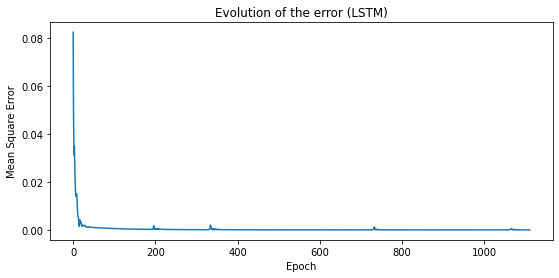

In [306]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.title("Evolution of the error (LSTM)")
plt.plot(loss_hist)
plt.show()

#### Day by day predictions

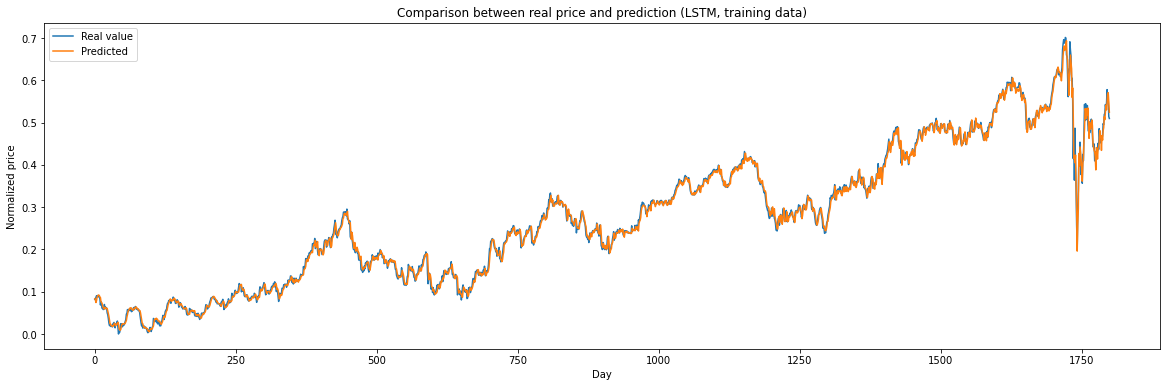

In [307]:
real_values = np.array([target[0][0] for target in y_train_tensor.cpu()])
LSTM_pred = np.array([res[0][0] for res in model(x_train_tensor).detach().cpu()])

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title("Comparison between real price and prediction (LSTM, training data)")
plt.plot(real_values, label="Real value")
plt.plot(LSTM_pred, label="Predicted")
plt.legend()
plt.show()

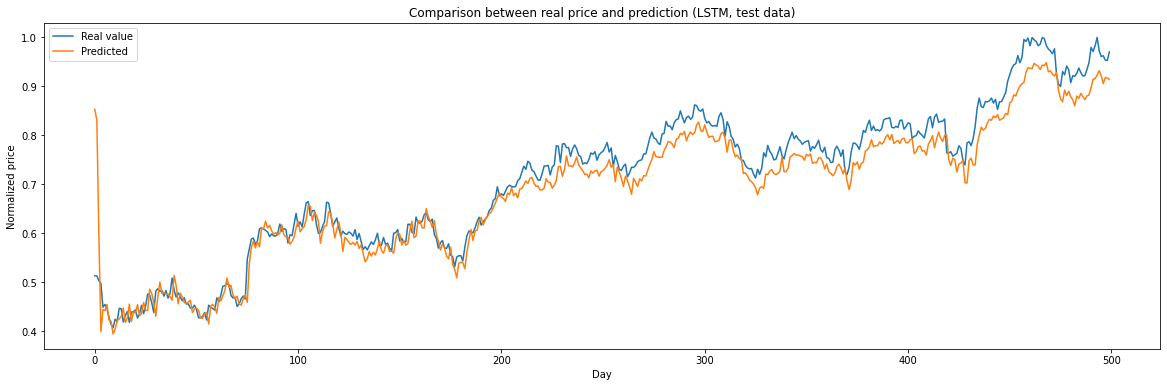

In [308]:
real_values = np.array([target[0][0] for target in y_test_tensor.cpu()])
LSTM_pred = np.array([res[0][0] for res in model(x_test_tensor).detach().cpu()])

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title("Comparison between real price and prediction (LSTM, test data)")
plt.plot(real_values, label="Real value")
plt.plot(LSTM_pred, label="Predicted")
plt.legend()
plt.show()

#### Chaining predictions

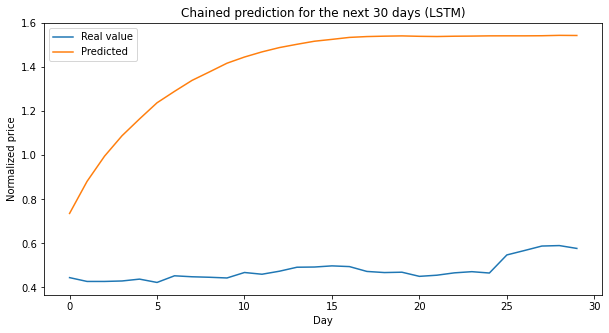

In [309]:
num_preds = 30
base_test_index = 50
base_data = x_test_tensor[base_test_index]
target_data = [target[0][0] for target in y_test_tensor[base_test_index:base_test_index + num_preds].cpu()]
x_data = base_data

for i in range(num_preds):
  single_pred = model(x_data)
  x_data = torch.roll(x_data, -1)
  x_data[0][-1] = single_pred[0][0]

prediction = x_data[0][-num_preds:].detach().cpu()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title(f"Chained prediction for the next {num_preds} days (LSTM)")
plt.plot(target_data, label="Real value")
plt.plot(prediction, label="Predicted")
plt.legend()
plt.show()

This does not work at all

### Price forecasting with a GRU

#### Defining and training the GRU model
- 2 layers of GRU
- 1 fully connected layer to get the ouput

In [310]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_output, _ = self.gru(x)
        y_pred = self.fc(gru_output)
        return y_pred

hidden_size = 64
num_layers = 2
output_size = 1
learning_rate = 0.01

model_GRU = GRU(input_size, hidden_size, num_layers, output_size)
model_GRU.to(device)

loss_fn_GRU = nn.MSELoss()
optimizer_GRU = optim.Adam(model_GRU.parameters(), lr=learning_rate)

In [311]:
num_sequences_given = 2_000_000
num_epochs = math.ceil(num_sequences_given / training_size)
loss_hist_GRU = np.zeros(num_epochs)

for t in range(num_epochs):

    y_train_pred = model_GRU(x_train_tensor)

    loss = loss_fn_GRU(y_train_pred, y_train_tensor)

    optimizer_GRU.zero_grad()

    loss.backward()

    optimizer_GRU.step()

    if (t + 1) % (int(num_epochs / 10)) == 0 and t !=0:
        print(f"Epoch {t + 1} MSE: {loss.item()}")
    loss_hist_GRU[t] = loss.item()

print("--- Training finished ---")

Epoch 111 MSE: 0.0005246904329396784
Epoch 222 MSE: 0.00022766549955122173
Epoch 333 MSE: 0.0001638245303183794
Epoch 444 MSE: 0.00013839812891092151
Epoch 555 MSE: 0.00012890015204902738
Epoch 666 MSE: 0.00012138856254750863
Epoch 777 MSE: 0.00011675411224132404
Epoch 888 MSE: 0.00011630414519459009
Epoch 999 MSE: 0.00011122482101200148
Epoch 1110 MSE: 0.00010706749162636697
--- Training finished ---


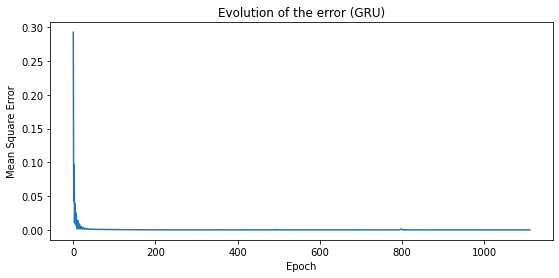

In [312]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.title("Evolution of the error (GRU)")
plt.plot(loss_hist_GRU)
plt.show()

#### Day by day predictions

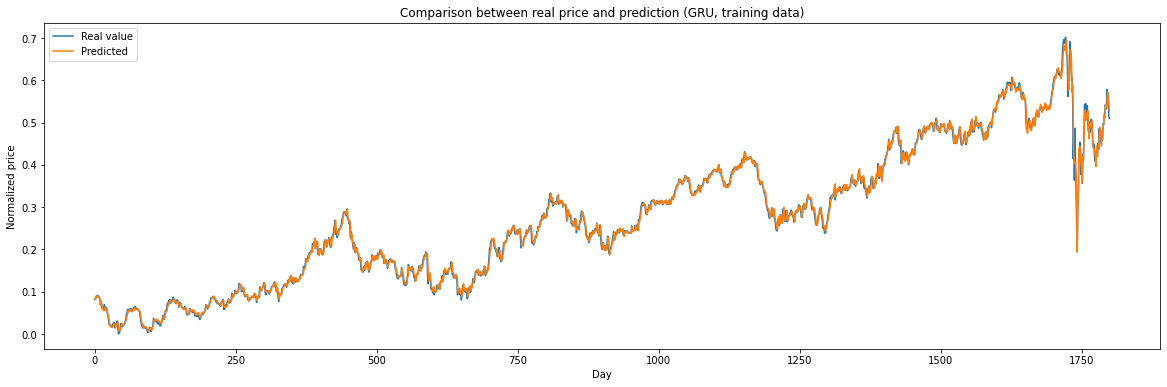

In [313]:
real_values = np.array([target[0][0] for target in y_train_tensor.cpu()])
GRU_pred = np.array([res[0][0] for res in model_GRU(x_train_tensor).detach().cpu()])

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()
plt.plot(real_values, label="Real value")
plt.plot(GRU_pred, label="Predicted")
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title("Comparison between real price and prediction (GRU, training data)")
plt.legend()
plt.show()

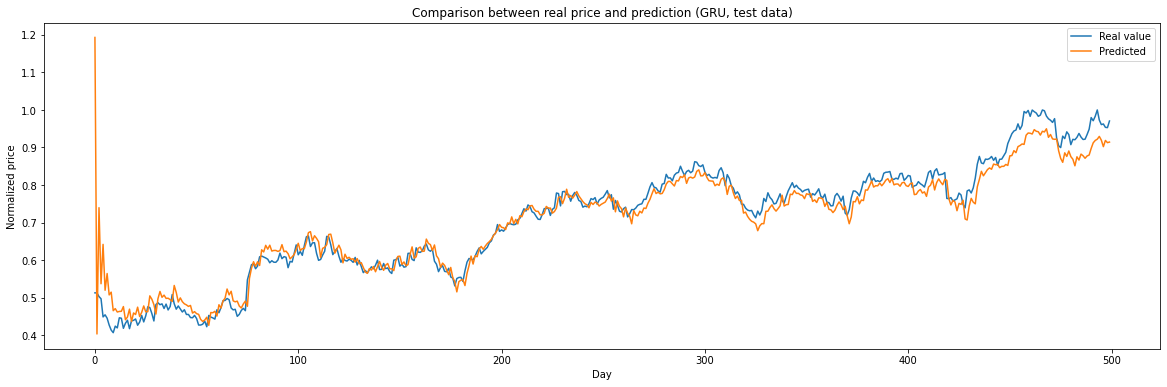

In [314]:
real_values = np.array([target[0][0] for target in y_test_tensor.cpu()])
GRU_pred = np.array([res[0][0] for res in model_GRU(x_test_tensor).detach().cpu()])

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title("Comparison between real price and prediction (GRU, test data)")
plt.plot(real_values, label="Real value")
plt.plot(GRU_pred, label="Predicted")
plt.legend()
plt.show()

#### Chaining predictions

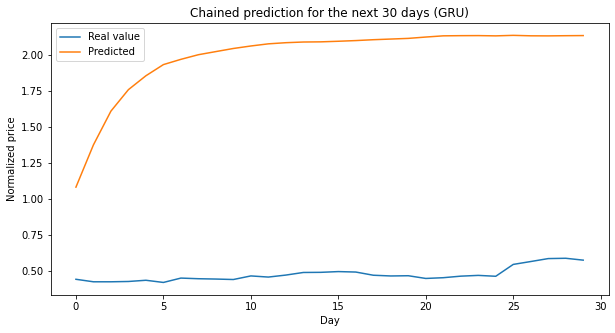

In [315]:
num_preds = 30
base_test_index = 50
base_data = x_test_tensor[base_test_index]
target_data = [target[0][0] for target in y_test_tensor[base_test_index:base_test_index + num_preds].cpu()]
x_data = base_data

for i in range(num_preds):
  single_pred = model_GRU(x_data)
  x_data = torch.roll(x_data, -1)
  x_data[0][-1] = single_pred[0][0]

prediction = x_data[0][-num_preds:].detach().cpu()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title(f"Chained prediction for the next {num_preds} days (GRU)")
plt.plot(target_data, label="Real value")
plt.plot(prediction, label="Predicted")
plt.legend()
plt.show()

### Comparison between the LSTM and the GRU results

Training data

In [316]:
real_prices_train = np.array([target[0][0] for target in y_train_tensor.cpu()])
LSTM_prices_pred_train = np.array([res[0][0] for res in model(x_train_tensor).detach().cpu()])
GRU_prices_pred_train = np.array([res[0][0] for res in model_GRU(x_train_tensor).detach().cpu()])

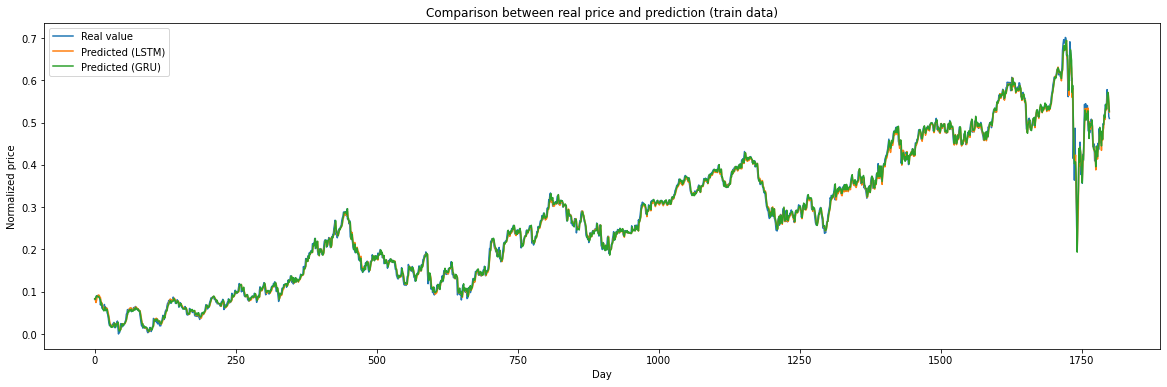

In [317]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title("Comparison between real price and prediction (train data)")
plt.plot(real_prices_train, label="Real value")
plt.plot(LSTM_prices_pred_train, label="Predicted (LSTM)")
plt.plot(GRU_prices_pred_train, label="Predicted (GRU)")
plt.legend()
plt.show()

Test data

In [318]:
real_prices_test = np.array([target[0][0] for target in y_test_tensor.cpu()])
LSTM_prices_pred_test = np.array([res[0][0] for res in model(x_test_tensor).detach().cpu()])
GRU_prices_pred_test = np.array([res[0][0] for res in model_GRU(x_test_tensor).detach().cpu()])

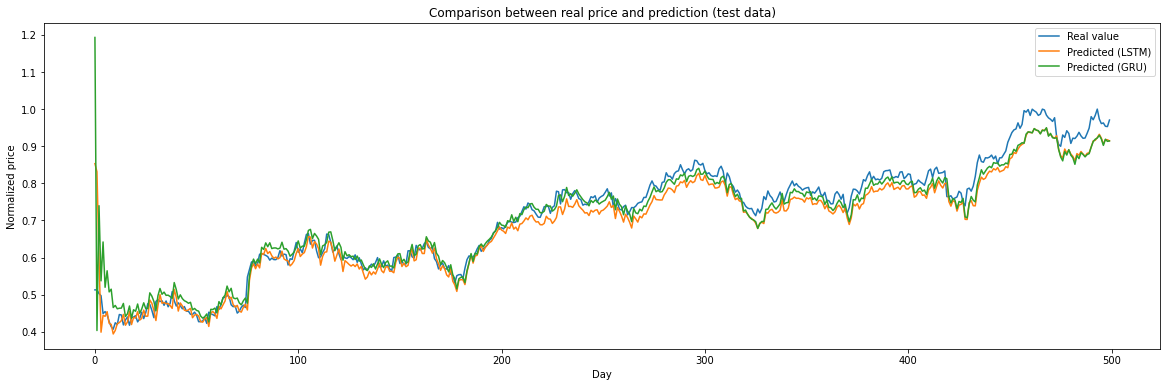

In [319]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Normalized price')
plt.title("Comparison between real price and prediction (test data)")
plt.plot(real_prices_test, label="Real value")
plt.plot(LSTM_prices_pred_test, label="Predicted (LSTM)")
plt.plot(GRU_prices_pred_test, label="Predicted (GRU)")
plt.legend()
plt.show()

In [320]:
LSTM_errors = real_prices_test - LSTM_prices_pred_test
GRU_errors = real_prices_test - GRU_prices_pred_test

In [321]:
print(f"Mean errors:\nLSTM: {LSTM_errors.mean()}\nGRU: {GRU_errors.mean()}")
print(f"\nStandard deviation of the errors:\nLSTM: {LSTM_errors.std()}\nGRU: {GRU_errors.std()}")
print(f"\nMedian of the errors:\nLSTM: {np.median(LSTM_errors)}\nGRU: {np.median(GRU_errors)}")

Mean errors:
LSTM: 0.023045456036925316
GRU: 0.00606163777410984

Standard deviation of the errors:
LSTM: 0.03238582983613014
GRU: 0.04412610083818436

Median of the errors:
LSTM: 0.02567952871322632
GRU: 0.009639948606491089


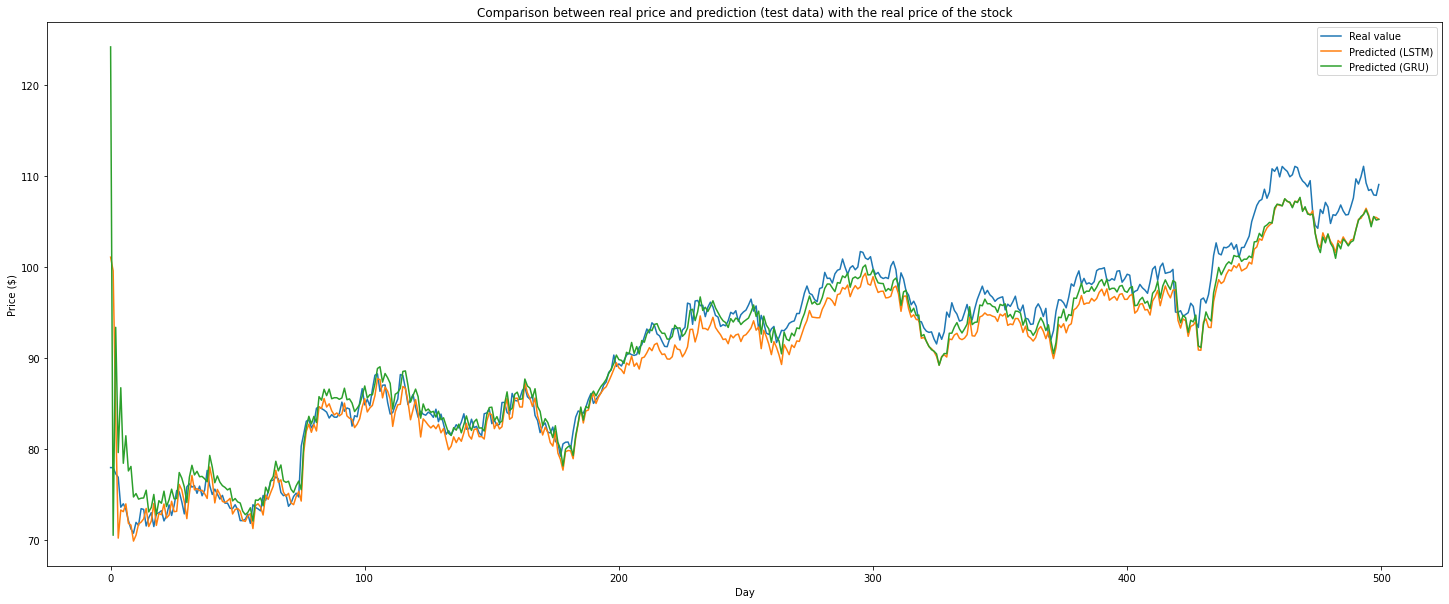

In [322]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot()
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.title("Comparison between real price and prediction (test data) with the real price of the stock")
plt.plot(denormalize(real_prices_test), label="Real value")
plt.plot(denormalize(LSTM_prices_pred_test), label="Predicted (LSTM)")
plt.plot(denormalize(GRU_prices_pred_test), label="Predicted (GRU)")
plt.legend()
plt.show()